# 7 - Carga y preprocesamiento de datos (Ejercicios)

En este apartado, hemos estudiado uno de los componentes más importantes del ciclo de vida de los modelos de inteligencia artificial: la adquisición y manipulación de los datos. En los conjuntos de datos propuestos, tendremos por una parte la información relativa a los atributos de la muestra, y por otra los nombres de los mismos. Tu tarea será:

* Importar desde consola por comandos Linux los ficheros oportunos.
* Leer los ficheros `data` y `names`.
* Explorar el fichero `names` para analizar qué tipo de expresiones regulares necesitas para identificar los nombres de las columnas en la metadata.
* Aplicar las transformaciones *regex* pertinentes y obtener los nombres de las columnas para construir los datos. *Pista: El nombre de la variable respuesta tendremos que añadirlo al final ya que no viene explícitamente citado*.
* Realizar un conveniente preprocesmiento de las variables en función de su tipo.

## 7.1 - *Adult* [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)



### Carga y Preprocesamiento de los datos

In [2]:
# Librerías
import os # Para obtener el directorio activo
import requests # Para descargar ficheros
import re
import pandas as pd
import numpy as np

In [7]:
# Creamos una carpeta para que contenga a nuestro dataset
!mkdir adult_dataset
# Movemos el directorio activo a esa localización
os.chdir("adult_dataset")

url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'

response_data = requests.get(url_data)
response_names = requests.get(url_names)

# Guardar los archivos descargados
with open('adult.data', 'wb') as f:
    f.write(response_data.content)

with open('adult.names', 'wb') as f:
    f.write(response_names.content)

# Leemos datos
with open(os.path.join(os.getcwd(),'adult.data'),'r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías

# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()

# Regex
## Buscamos palabras que empiecen por letras mayús. o minús. de duración variable y que tengan dos puntos
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)  
## Buscamos palabras con letras mayús. o minús. de duración variable
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)  

# Aplicamos la expresión regular en forma de lambda a al metadata
# Téngase en cuenta que el método findall devuelve una lista vacía si ninguna expresión coincide con el patrón introducido

metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']

# Construimos el objeto pd.DataFrame
df_ADULT = pd.DataFrame(data=data, columns=col_names)
df_ADULT

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Comenzamos el análisis de los datos buscando su información general

In [127]:
df = df_ADULT.copy() # Copiamos el dataframe para no modificar el original y trabajar con una variable de nombre corto.
df.info() # Como se puede apreciar, todas las columnas son de "Dtype: object", lo que quiere decir que probablemente sean strings, cosa que no tiene
# sentido, por ejemplo, para la edad. De hecho, si vamos a la fuente, observaremos lo siguiente:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


Descripción de las variables:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Por lo pronto, vamos a ver el aspecto de los primeros datos

In [128]:
df.head() # Al menos 6 de las columnas deben ser numéricas tal y como está indicado en adult.names (continuous)
# Estas variables son: age, fnlwgt, education-num, capital-gain, capital-loss y hours-per-week.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Recordatorio: una forma de hacerlo directamente con **todas** las variables que se pueda es la siguiente:
```python
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

df.info()
```

In [129]:
# Transformación del tipo de las variables a numérico:

df["age"] = df["age"].astype(int)
df["fnlwgt"] = df["fnlwgt"].astype(int)
df["education-num"] = df["education-num"].astype(int)
df["capital-gain"] = df["capital-gain"].astype(int)
df["capital-loss"] = df["capital-loss"].astype(int)
df["hours-per-week"] = df["hours-per-week"].astype(int)

# Finalmente, comprobamos que las variables son números ahora:
df.info()

# Obtenemos un error porque uno de los valores, además de ser un string, es un string vacío, por lo que no puede ser transformado a int.

ValueError: invalid literal for int() with base 10: ''

Vamos entonces a estudiar los valores nulos de las variables

In [130]:
df["age"].unique() # Se puede ver que uno de los valores es un vacío, por lo que no vamos a poder convertir los datos de string a número.

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '57', '44', '41', '29', '18',
       '47', '46', '36', '79', '27', '67', '33', '76', '17', '55', '61',
       '70', '64', '71', '68', '66', '51', '58', '26', '60', '90', '75',
       '65', '77', '62', '63', '80', '72', '74', '69', '73', '81', '78',
       '88', '82', '83', '84', '85', '86', '87', ''], dtype=object)

In [131]:
df["age"].isnull().value_counts() # Vemos que no hay valores nulos, sino un string vacío, asi que vamos a corregir esto

False    32562
Name: age, dtype: int64

In [132]:
df["age"] #Parece que es el último dato el que falla, vamos a ver las últimas filas 

0        39
1        50
2        38
3        53
4        28
         ..
32557    40
32558    58
32559    22
32560    52
32561      
Name: age, Length: 32562, dtype: object

In [133]:
df.tail() # En efecto, en la base de datos hay una fila extra vacía que provoca fallos y no aporta información, así que vamos a borrarla.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K
32561,,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [134]:
#Para borrar la última fila, podemos hacer lo siguiente:
df.index[-1] # Nos da el índice de la fila del final, comprobamos que es la 32561
df = df.drop(df.index[32561]) # Borramos la fila del final, la 32561
df.tail()

# Este código solo va a funcionar una vez pues la fila 32561 ya no existe, pero si indicásemos la fila del final con un -1, se borraría la última fila
# constantemente al ejecutar este comando.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [135]:
# Una forma de que no pase lo anterior sería la siguiente:
df = df_ADULT.copy() # Explicitamos esta línea aquí para generar el df de nuevo.
df = df.drop(df.index[-1])  # Borramos la última fila.
df.tail() # Ahora siempre se verá que la última fila es la número 32560 da igual cuantas veces se ejecute el código.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [136]:
# Transformación del tipo de las variables a numérico:

df["age"] = df["age"].astype(int)
df["fnlwgt"] = df["fnlwgt"].astype(int)
df["education-num"] = df["education-num"].astype(int)
df["capital-gain"] = df["capital-gain"].astype(int)
df["capital-loss"] = df["capital-loss"].astype(int)
df["hours-per-week"] = df["hours-per-week"].astype(int)

# Finalmente, comprobamos que las variables son números ahora:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


Hasta aquí, hemos eliminado todos los valores nulos, ahora hay que comprobar si los valores no-nulos son valores válidos o no.

In [137]:
# De forma un poco rudimentaria, pero útil a modo de práctica, podemos emplear el comando .unique() para ver los valores únicos de cada columna

#print(df["age"].unique()) # Todo correcto, ponemos un # para que la línea no se ejecute 

#####print(df["workclass"].unique()) # Problemas, hay una categoría de datos que es "?"

#print(df["fnlwgt"].unique()) # No se pueden ver todos los datos, hace falta otro método, como un groupby. ### Comprobado que está bien.

#print(df["education"].unique()) # Todo correcto

#print(df["education-num"].unique()) # Todo correcto

#print(df["marital-status"].unique()) # Todo correcto

#####print(df["occupation"].unique()) # Hay una categoría "?"

#print(df["relationship"].unique()) # Todo correcto

#print(df["race"].unique()) # Todo correcto

#print(df["sex"].unique()) # Todo correcto

#print(df["capital-gain"].unique()) # Todo correcto

#print(df["capital-loss"].unique()) # Todo correcto

#print(df["hours-per-week"].unique()) # Todo correcto, aunque hay gente que trabaja más de 90h a la semana, pobrecitos

#####print(df["native-country"].unique()) # Hay una categoría "?"

#print(df["label"].unique()) # Todo correcto

In [ ]:
# Una forma más rápida y directa es con el siguiente comando:
for col in df.columns: # Para cada columna del dataframe:
    print(df[col].unique()) # Imprimimos los valores/categorías únicas de cada columna
    print("\n") # y un espacio de línea

Una forma rápida de agrupar las variables es con el código que viene a continuación:  

```python
# Sacamos los nombres de las columnas numéricas y categóricas
def tipo_de_columnas_ordenadas (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = tipo_de_columnas_ordenadas(df)
print("Las columnas categóricas son: ", cat)
print("Las columnas numéricas son: ", num)

# Es una buena forma de agrupar las variables según su tipo, especialmente cuando tenemos un número elevado de columnas, aunque requiere de una buena
# limpieza previa de los datos.
```

Vamos a estudiar los casos específicos de "workclass", "fnlwgt", "occupation" y "native-country"

In [149]:
df["workclass"].value_counts() # Hay 1836 valores que no tienen una "?"

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
print(df.sort_values(by = "fnlwgt")) # En la columna fnlwgt no hay valores extraños como "?" ni cerca del mínimo ni del máximo, por lo que esta variable está bien

In [140]:
df["occupation"].value_counts() # Hay 1843 valores que no tienen valores de profesión

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [146]:
df["native-country"].value_counts() # Hay 583 personas que no tienen país de origen

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Vamos a eliminar entonces los datos indeterminados y sustituirlos por valores nulos

In [155]:
# Reemplazamos ' ?' (si, con espacio) por nulo
df = df.replace(' ?',np.NaN)

# Vemos qué columnas tienen datos faltantes
missing_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)

# Filtramos las filas donde hay algún dato nulo, y las columnas donde están
df.loc[df.isnull().sum(axis=1)>0, missing_cols]

,workclass,occupation,native-country
14,Private,Craft-repair,NaN
27,NaN,NaN,South
38,Private,Sales,NaN
51,Private,Other-service,NaN
61,NaN,NaN,NaN
...,...,...,...
32530,NaN,NaN,United-States
32531,NaN,NaN,United-States
32539,NaN,NaN,United-States
32541,NaN,NaN,United-States


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


Ahora tenemos valores nulos en Workclass, Occupation y Native-Country. ¿Qué podemos hacer con ellos? Al ser variables atributos (no numéricas, sino palabras, categóricas) la mejor opción es asignarles la moda a esos valores, que son "Private", "Prof-Specialty" y "USA" respectivamente.

```python
def replace_missing_data(df):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df[col].dtype in ['object']:
            mode_col = df[col].mode().values[0]
            df[col] = df[col].fillna(mode_col)
        # Si son números enteros
        elif df[col].dtype in ['int']:
            df[col] = df[col].fillna(df['col'].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            df[col] = df[col].fillna(df['col'].mean())
    # Devolvemos el DataFrame
    return df
```

In [186]:
def replace_missing_data(df):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df[col].dtype in ['object']:
            mode_col = df[col].mode().values[0]
            df[col] = df[col].fillna(mode_col)
        # Si son números enteros
        elif df[col].dtype in ['int']:
            df[col] = df[col].fillna(df['col'].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            df[col] = df[col].fillna(df['col'].mean())
    # Devolvemos el DataFrame
    return df

replace_missing_data(df)
print(df.info()) # Hemos solucionado todos los errores nulos
df[["workclass", "occupation", "native-country"]][60:63] # Antes había problemas en workclass, occupation y native-country en la linea 61

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB
None


,workclass,occupation,native-country
60,Private,Sales,United-States
61,Private,Prof-specialty,United-States
62,Private,Transport-moving,United-States


Ya hemos corregido nuestra base de datos. Hemos eliminado celdas vacías y hemos sustituido los valores nulos por la moda de sus respectivas columnas al tratarse de variables atributo (palabras). Nuestra base de datos ya está lista para ser estudiada y analizada por los expertos 😎👌

Recordatorio: Código para discretizar variables:

```python
  # Tomamos el mínimo y máximo de los datos
  min_col, max_col = df['engine-size'].min(), df['engine-size'].max()
  # Decidimos en cuántas cajas vamos a estratificar los datos
  num_boxes = 8
  # Creamos los valores que segmentarán las cajas
  bins = np.linspace(min_col, max_col, num_boxes+1)
  # Creamos la columna discretizada
  df['engine-size-disc'] = np.digitize(df['engine-size'], bins)
```

### Análisis estadístico de los datos (Explayarse todo lo que uno quiera)

<Axes: >

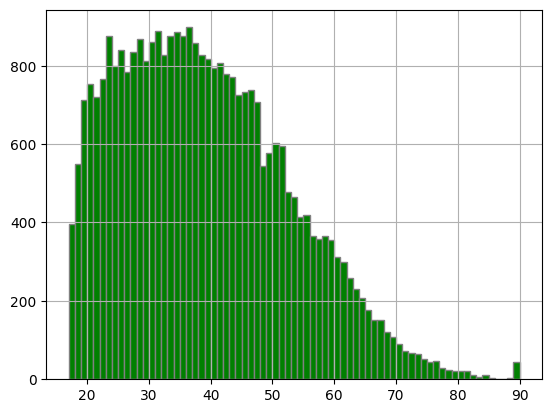

In [215]:
# Intervalo de edad
intervalo_edad = df["age"].max()-df["age"].min()

#Histograma con la edad
df["age"].hist(bins = intervalo_edad, color = "green", edgecolor = "grey")

## 7.2 - Beijing Multi-Site [Air Quality Data](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

En este conjunto de datos no tendremos que hacer un esfuerzo muy grande en lo relativo a estudiar la *metadata*, pero exploraremos una serie de comandos de Linux que nos será muy útil conocer:

### La manera de Andrés (no me funciona)

In [ ]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir /content/air_quality_dataset
## Movemos directorio activo
%cd /content/air_quality_dataset
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228

### La manera de Demetrio

Introducimos los datos: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

In [1]:
#lo primero que vemos aqui, es que la url ya no conduce a los datos, con lo cual dentro de esa pagina, en su buscador escribimos beijing y accedemos a los datos

nueva_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'

#tenemos una extension .zip, quiere decir que es un archivo comprimido, por lo que necesitamos descomprimirlo
import requests
import zipfile
import io

#vamos a crear una carpeta donde guardaremos los datos
import os

#creamos la carpeta
os.makedirs('./beijing', exist_ok=True)

#descargamos el archivo
r = requests.get(nueva_url)

#creamos un objeto zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))

#extraemos los archivos
z.extractall('./beijing')

Creamos el dataframe con los datos. Como se puede ver en los csv, todos los datos tienen las mismas columnas asi que se pueden concatenar sin problema para formar una única masa de datos

In [3]:
import pandas as pd

#creamos un dataframe vacio
df = pd.DataFrame()

#iteramos sobre los archivos de la carpeta beijing y los leemos con pandas(recuerden que al descomprimir, se creo 
#una carpeta nueva C:\Users\demst\OneDrive\Escritorio\preprocesamiento\beijing\PRSA_Data_20130301-20170228)

for file in os.listdir('./beijing/PRSA_Data_20130301-20170228'):            #Por cada archivo en nuestra carpeta del notebook:
    if file.endswith('.csv'):                                               #Si el archivo termina en .csv:
        df = pd.concat([df, pd.read_csv('./beijing/PRSA_Data_20130301-20170228/' + file)])  #leemos el archivo y lo concatenamos a nuestro dataframe


In [6]:
df # echamos un vistazo a los primeros y ultimos datos, así como a sus dimensiones (420768 filas por 18 columnas)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [5]:
df.info() # Observamos los datos nulos en cada variable/columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [7]:
#ya tenemos nuestro df, ahora vamos a comprobar los valores repetidos y los valores nulos
print(df.duplicated().sum()) # df.duplicated indica un booleano si hay valores duplicados, y sum() los agrega. Como se puede ver, no hay valores repes.

0


Ahora sabemos que no hay valores repetidos, pero, ¿qué hay de los valores nulos? En la tabla anterior (df.info()) hemos visto que sí hay.

In [8]:
#nulos por agregación
print(df.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [9]:
#nulos por % 
print(df.isnull().sum()/len(df)*100)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


Como se puede ver, parece que variables como NO2, CO u O3, entre otros, tienen gran cantidad de datos faltantes, pero en términos relativos no suponen ni el 5% del total. Esto también es importante tenerlo en cuenta para saber si seremos capaces o si sería responsable tomar la decisión de sustituir los datos faltantes a raíz de los existentes (podemos rellenar el 2% con el otro 98%, pero no podemos rellenar un 85% con un 15%).

In [10]:
#vemos de que tipo son nuestros datos
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [11]:
#reparamos los valores nulos usando la super-mega-funcion de andres para reparar float, objets y ints, ya que representan 
#muy poco % de los datos y no afectaran el modelo. Si el % fuera mayor (por ejemplo, un 20%) podriamos usar el algoritmo knn

def impute_missing_values(df):
    for col in df.columns:  # Para cada columna en df:
        if df[col].dtype == 'float64':  # Si el tipo de dato es float64:
            df[col] = df[col].fillna(df[col].mean()) # Sustituimos los valores nulos con la MEDIA de la columna
        elif df[col].dtype == 'object': # Si el tipo de dato es object (señal de que suele ser string):
            df[col] = df[col].fillna(df[col].mode()[0]) # Sustituimos los valores nulos con la MODA de la columna
        else: # Si no es ninguno de los anteriores (en este caso, viendo la tabla anterior, si es un int):
            df[col] = df[col].fillna(df[col].median()) # Sustituimos los valores nulos con la MEDIANA de la columna
    return df

df = impute_missing_values(df) 

In [12]:
#vemos que ya no hay valores nulos
print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Así hemos arreglado la base de datos. Además, al haber tantos datos (muestra de 420k datos en total) y pocos datos nulos (4,92% en el peor de los casos) no es especialmente descabellado proponer como método de sustitución de valores nulos la media, moda y mediana según corresponda. 

### Análisis estadístico de los datos (Explayarse todo lo que uno quiera)

#### Ahora te toca, ¿eres capaz de leer todos los `csv`, concatenarlos y construir un `pd.DataFrame` en una sola línea de código?


```python
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)
```

## 7.3 - Solar flare [dataset](https://archive.ics.uci.edu/ml/datasets/Solar+Flare)

En este conjunto de datos, tendremos dos ficheros relativos a `data`, cuya primera fila serán las especificaciones temporales, por lo que deberemos quitarla, y además en los registros de datos las variables no vienen delimitadas por `','`, si no por espacios en blanco:

### La manera de Andrés (no me funciona)

In [216]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos dos niveles
%cd ..
%cd ..
## Creamos carpeta
!mkdir /content/solar_flare_dataset
## Movemos directorio activo
%cd /content/solar_flare_dataset
# Descargamos los ficheros que contienen los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2
# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names
# Leemos datos
## Leemos primer fichero de datos
with open(os.path.join(os.getcwd(),'flare.data1'),'r') as f:
    data1 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data1 = [elem.split(' ') for elem in data1 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data1 = data1[1:] # Quitamos la línea de metadata temporal
## Leemos segundo fichero de datos
with open(os.path.join(os.getcwd(),'flare.data2'),'r') as f:
    data2 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data2 = [elem.split(' ') for elem in data2 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data2 = data2[1:] # Quitamos la línea de metadata temporal
## Combinamos ambas listas
data = data1+data2
# Leemos metadata
with open(os.path.join(os.getcwd(),'flare.names'),'r') as f:
    metadata = f.read().splitlines()
## Regex
regex_fn = lambda text: re.findall('^\s+[0-9]+\.{1}\s{1}[a-zA-Z- ]+', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0].strip() for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)]
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

c:\Users\juanv\Desktop\Cursos Realizados\Curso Data Analytics\Carpeta\Módulo 1\Carga y preprocesamiento de datos\adult_dataset\adult_dataset\adult_dataset\adult_dataset\adult_dataset\adult_dataset
c:\Users\juanv\Desktop\Cursos Realizados\Curso Data Analytics\Carpeta\Módulo 1\Carga y preprocesamiento de datos\adult_dataset\adult_dataset\adult_dataset\adult_dataset\adult_dataset


c:\Users\juanv\Desktop\Cursos Realizados\Curso Data Analytics\Carpeta\mi_entorno\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


[WinError 3] El sistema no puede encontrar la ruta especificada: '/content/solar_flare_dataset'
c:\Users\juanv\Desktop\Cursos Realizados\Curso Data Analytics\Carpeta\Módulo 1\Carga y preprocesamiento de datos\adult_dataset\adult_dataset\adult_dataset\adult_dataset\adult_dataset


La sintaxis del comando no es correcta.
c:\Users\juanv\Desktop\Cursos Realizados\Curso Data Analytics\Carpeta\mi_entorno\lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\juanv\\Desktop\\Cursos Realizados\\Curso Data Analytics\\Carpeta\\Módulo 1\\Carga y preprocesamiento de datos\\adult_dataset\\adult_dataset\\adult_dataset\\adult_dataset\\adult_dataset\\flare.data1'

### La manera de Demetrio

https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1 <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2

In [221]:
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1'
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2'
url3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names'

In [222]:
# Vemos qué tenemos dentro de cada variable
# data1
import requests
response = requests.get(url1)
data1 = response.text
data1

'*******DATA1; 1969 FLARE DATA  (02/13/69 to 03/27/69) *******\nC S O 1 2 1 1 2 1 2 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nC S O 1 3 1 1 2 1 1 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 1 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD K O 1 3 1 1 2 1 2 0 0 0\nC R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD S O 1 2 1 1 2 1 1 0 0 0\nC H I 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD K I 1 3 1 1 2 1 2 0 0 0\nD S O 1 2 1 1 2 1 2 0 0 0\nD R O 1 2 1 1 2 1 1 0 0 0\nC A I 1 2 1 1 2 1 2 0 0 0\nC S O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nF K I 1 3 1 2 2 1 2 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nH R X 1 2 1 1 1 1 2 0 0 0\nB X I 1 3 1 1 2 1 1 0 0 0\nC R I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD A I 1 3 1 2 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 1 0 1\nB X O 1 3 1 1 2 1 1 0 0 0\nD A I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 

Se ve que los datos están separados por espacios en vez de por comas

In [223]:
# data2
response = requests.get(url2)
data2 = response.text
data2

'******* DATA2; 1978 FLARE DATA (08/19/78 to 12/23/78) *****\nH A X 1 3 1 1 1 1 1 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nC S O 1 3 1 1 2 1 1 0 0 0\nH R X 1 2 1 1 1 1 1 0 0 0\nH S X 1 1 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nC A O 1 3 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 1 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X I 1 2 1 1 2 1 1 0 0 0\nC S O 2 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nD R I 1 3 1 1 2 1 1 1 0 0\nH S X 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nB X O 1 2 1 2 2 1 1 0 0 0\nH S X 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 2 2 1 2 2 1 1 0 0 0\nC R O 1 3 1 1 2 1 1 5 0 0\nB X O 1 2 1 2 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD A I 2 3 1 1 2 1 1 2 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 1 1 2 2 1 1 0 0 0\nB X O 1 1 1 1 2 1 1 0 0 0\nC R I 2 1 1 2 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD R I 1 3 1 2 2 1 1 

In [224]:
#creamos un dataframe con los datos de data1 y data2 
import pandas as pd
import io

#Leemos los datos como un csv de string separado por espacios
data1df = pd.read_csv(io.StringIO(data1), sep=' ')
data2df = pd.read_csv(io.StringIO(data2), sep=' ')

#vemos que tenemos en data1
data1df.head()

*******DATA1;  1969  FLARE  DATA  Unnamed: 4  (02/13/69  to  \
C S O 1              2     1      1     2           1          2   0   
D S O 1              3     1      1     2           1          2   0   
C S O 1              3     1      1     2           1          1   0   
D S O 1              3     1      1     2           1          2   0   
  A O 1              3     1      1     2           1          2   0   

         03/27/69)  *******  
C S O 1          0        0  
D S O 1          0        0  
C S O 1          0        0  
D S O 1          0        0  
  A O 1          0        0

In [225]:
#vemos que tenemos en data2
data2df.head()

*******  DATA2;  1978  FLARE  DATA  (08/19/78  to  12/23/78)  *****
H A X 1        3       1     1      1     1          1   0          0      0
D R O 1        3       1     1      2     1          1   0          0      0
C S O 1        3       1     1      2     1          1   0          0      0
H R X 1        2       1     1      1     1          1   0          0      0
  S X 1        1       1     1      2     1          1   0          0      0

In [226]:
#podemos ver el mismo problema en el nombre de las columnas, ya que usaron un texto como nombre de columna
#vamos a quitar ese texto de los archivos
#recuerden que el texto lo podemos ver arriba cuando hicimos el print es *******DATA1;	1969	FLARE	DATA	Unnamed: 4	(02/13/69	to	03/27/69)	*******
#y 	*******	DATA2;	1978	FLARE	DATA	(08/19/78	to	12/23/78)	*****

#vamos a quitar el texto de las columnas creando nuevos dataframes a partir del texto que queremos quitar
data1 
#al hacer el print vemos como despues del texto que queremos quitar empiezan los datos

'*******DATA1; 1969 FLARE DATA  (02/13/69 to 03/27/69) *******\nC S O 1 2 1 1 2 1 2 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nC S O 1 3 1 1 2 1 1 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 1 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD K O 1 3 1 1 2 1 2 0 0 0\nC R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD S O 1 2 1 1 2 1 1 0 0 0\nC H I 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD K I 1 3 1 1 2 1 2 0 0 0\nD S O 1 2 1 1 2 1 2 0 0 0\nD R O 1 2 1 1 2 1 1 0 0 0\nC A I 1 2 1 1 2 1 2 0 0 0\nC S O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nF K I 1 3 1 2 2 1 2 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nH R X 1 2 1 1 1 1 2 0 0 0\nB X I 1 3 1 1 2 1 1 0 0 0\nC R I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD A I 1 3 1 2 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 1 0 1\nB X O 1 3 1 1 2 1 1 0 0 0\nD A I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 

In [227]:
#mediante expresiones regulares vamos a quitar el texto que no queremos
import re

#esto significa que vamos a quitar todo lo que este antes de DATA1; y todo lo que este despues de DATA1; y antes de un salto de linea, y lo vamos a 
#sustituir por "" en data1 (y lo mismo para data2)
data1 = re.sub(r'.*DATA1;.*\n', '', data1) 
data2 = re.sub(r'.*DATA2;.*\n', '', data2) 

In [228]:
data1

'C S O 1 2 1 1 2 1 2 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nC S O 1 3 1 1 2 1 1 0 0 0\nD S O 1 3 1 1 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 1 0 0 0\nD A O 1 2 1 1 2 1 2 0 0 0\nD K O 1 3 1 1 2 1 2 0 0 0\nC R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD S O 1 2 1 1 2 1 1 0 0 0\nC H I 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD K I 1 3 1 1 2 1 2 0 0 0\nD S O 1 2 1 1 2 1 2 0 0 0\nD R O 1 2 1 1 2 1 1 0 0 0\nC A I 1 2 1 1 2 1 2 0 0 0\nC S O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nF K I 1 3 1 2 2 1 2 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nH R X 1 2 1 1 1 1 2 0 0 0\nB X I 1 3 1 1 2 1 1 0 0 0\nC R I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD A I 1 3 1 2 2 1 2 0 0 0\nD A O 1 3 1 1 2 1 2 1 0 1\nB X O 1 3 1 1 2 1 1 0 0 0\nD A I 1 3 1 1 2 1 2 0 0 0\nB X O 1 3 1 1 2 1 2 0 0 0\nD R O 1 3 1 1 2 1 2 0 0 0\nD A O 1 2 1 1 2 1 1 0 0 0\nC A I 1 3 1 1 2 1 1 0 0 0\n

In [229]:
data2

'H A X 1 3 1 1 1 1 1 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nC S O 1 3 1 1 2 1 1 0 0 0\nH R X 1 2 1 1 1 1 1 0 0 0\nH S X 1 1 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nC A O 1 3 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 1 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nC A O 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X I 1 2 1 1 2 1 1 0 0 0\nC S O 2 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nD R I 1 3 1 1 2 1 1 1 0 0\nH S X 1 3 1 1 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nB X O 1 2 1 2 2 1 1 0 0 0\nH S X 1 2 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 2 2 1 2 2 1 1 0 0 0\nC R O 1 3 1 1 2 1 1 5 0 0\nB X O 1 2 1 2 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD A I 2 3 1 1 2 1 1 2 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD R O 1 3 1 1 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nB X O 1 1 1 2 2 1 1 0 0 0\nB X O 1 1 1 1 2 1 1 0 0 0\nC R I 2 1 1 2 2 1 1 0 0 0\nB X O 1 3 1 1 2 1 1 0 0 0\nD R I 1 3 1 2 2 1 1 0 0 0\nB X O 1 2 1 1 2 1 1 0 0 0\nC R O 1 3 1 1 2 1 1 0 0 0\n

In [230]:
#podemos crear un df ahora con los datos limpios, separados por espacios

#Volvemos a hacer lo mismo de antes, pero ahora con los datos 1 y 2 transformados con la operación anterior.
data1df = pd.read_csv(io.StringIO(data1), sep=' ', header=None)   #header=none para que no tome la primera fila como nombre de columna
data2df = pd.read_csv(io.StringIO(data2), sep=' ' , header=None)  #.io para que lo tome como un archivo de texto

In [235]:
data1df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0


In [236]:
data2df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0


Ahora que hemos limpiado los datos, vamos a trabajar con el archivo de nombres

In [237]:
response = requests.get(url3)
data3 = response.text
print(data3) #vemos que las columnas estan en el punto 7

1. TItle: Solar Flare database

2. Source Information
   -- Donor: Gary Bradshaw <gbradshaw@clipr.colorado.EDU>
   -- Date: 3/89

3. Past Usage:
   -- Gary Bradshaw: (Class Attributes were collapsed to 0 and >0)
   -- See the past-usage file for a note written by Gary Bradshaw

4. Relevant Information:
   -- The database contains 3 potential classes, one for the number of times a
      certain type of solar flare occured in a 24 hour period.
   -- Each instance represents captured features for 1 active region on the 
      sun.
   -- The data are divided into two sections. The second section (flare.data2)
      has had much more error correction applied to the it, and has 
      consequently been treated as more reliable.

5. Number of Instances:  flare.data1: 323, flare.data2: 1066

6. Number of attributes:  13 (includes 3 class attributes)

7. Attribute Information:
   1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
   2. Code for largest spot size              (X,R,S,A,H,

¿Cómo accedemos a los nombres de las columnas, que están en el apartado 7 de data3?

In [238]:
#extraemos la info del punto 7. "Attribute Information" , vemos que tenemos el 7 con un punto, eso es bueno para localizar
#Vamos a quedarnos con lo que exista despues del punto 7 y antes del punto 8
data3 = re.search(r'7\..*8\.', data3, re.DOTALL).group(0) #re.DOTALL para que tome en cuenta los saltos de linea

In [239]:
print(data3) #Vemos la información que ha extraído de data 3

7. Attribute Information:
   1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
   2. Code for largest spot size              (X,R,S,A,H,K)
   3. Code for spot distribution              (X,O,I,C)
   4. Activity                                (1 = reduced, 2 = unchanged)
   5. Evolution                               (1 = decay, 2 = no growth, 
                                               3 = growth)
   6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,
                                               2 = one M1,
                                               3 = more activity than one M1)
   7. Historically-complex                    (1 = Yes, 2 = No)
   8. Did region become historically complex  (1 = yes, 2 = no) 
      on this pass across the sun's disk
   9. Area                                    (1 = small, 2 = large)
  10. Area of the largest spot                (1 = <=5, 2 = >5)

 From all these predictors three classes of flares are predicted, which

Ahora queremos acceder a cada uno de los puntos para convertirlos en los encabezados del df.

In [240]:
#creamos un patron para extraer los nombres de las columnas

#\d+ para que tome cualquier numero de digitos
#\s+ para que tome cualquier espacio en blanco
#[^\(\n]+ para que tome cualquier caracter que no sea un parentesis o un salto de linea

pattern = re.compile(r'\d+\.\s+([^\(\n]+)') 

# Encontramos todas las coincidencias
columns = pattern.findall(data3) #findall 

# Mostramos los nombres de las columnas con un bucle
for col in columns:
    print(col.strip())

Attribute Information:
Code for class
Code for largest spot size
Code for spot distribution
Activity
Evolution
Previous 24 hour flare activity code
Historically-complex
Did region become historically complex
Area
Area of the largest spot
C-class flares production by this region    Number
M-class flares production by this region    Number
X-class flares production by this region    Number


In [242]:
columns

['Attribute Information:',
 'Code for class ',
 'Code for largest spot size              ',
 'Code for spot distribution              ',
 'Activity                                ',
 'Evolution                               ',
 'Previous 24 hour flare activity code    ',
 'Historically-complex                    ',
 'Did region become historically complex  ',
 'Area                                    ',
 'Area of the largest spot                ',
 'C-class flares production by this region    Number  ',
 'M-class flares production by this region    Number',
 'X-class flares production by this region    Number']

In [243]:
#ahora eliminamos la palabra 'Number' de las últimas 3 filas y Attribute Information: de la primera fila de nuestra nueva variable columns
columns = [re.sub(r'Number', '', col) for col in columns] #re.sub para reemplazar 'Number' por nada en "col"
columns = [re.sub(r'Attribute Information:', '', col) for col in columns] #re.sub para reemplazar 'Attribute Information:' por nada en "col"

In [244]:
columns #vemos que ya no tenemos 'Number' ni 'Attribute Information:', ahora podemos limpiar todo de caracteres especiales

['',
 'Code for class ',
 'Code for largest spot size              ',
 'Code for spot distribution              ',
 'Activity                                ',
 'Evolution                               ',
 'Previous 24 hour flare activity code    ',
 'Historically-complex                    ',
 'Did region become historically complex  ',
 'Area                                    ',
 'Area of the largest spot                ',
 'C-class flares production by this region      ',
 'M-class flares production by this region    ',
 'X-class flares production by this region    ']

In [245]:
#vamos a limpiar los nombres de las columnas eliminando los espacios en blanco y caracteres especiales
columns = [re.sub(r'[^\w]', '', col) for col in columns] #re.sub para reemplazar cualquier caracter que no sea una letra o un numero por nada en (cada) col
columns = [col.lower() for col in columns] #pasamos todo a minusculas

columns #vemos que ya tenemos los nombres de las columnas limpios

['',
 'codeforclass',
 'codeforlargestspotsize',
 'codeforspotdistribution',
 'activity',
 'evolution',
 'previous24hourflareactivitycode',
 'historicallycomplex',
 'didregionbecomehistoricallycomplex',
 'area',
 'areaofthelargestspot',
 'cclassflaresproductionbythisregion',
 'mclassflaresproductionbythisregion',
 'xclassflaresproductionbythisregion']

In [246]:
#eliminamos el primer elemento de la lista ya que esta vacio
if columns and columns[0] == '':
    columns.pop(0)

In [247]:
columns

['codeforclass',
 'codeforlargestspotsize',
 'codeforspotdistribution',
 'activity',
 'evolution',
 'previous24hourflareactivitycode',
 'historicallycomplex',
 'didregionbecomehistoricallycomplex',
 'area',
 'areaofthelargestspot',
 'cclassflaresproductionbythisregion',
 'mclassflaresproductionbythisregion',
 'xclassflaresproductionbythisregion']

Con esto ya hemos obtenido los nombres de todas las columnas de data1 y data2, por lo que vamos a unirlos y a indicar sus columnas

In [248]:
df = pd.concat([data1df, data2df], axis=0) #unimos ambas bases de datos. axis=0 para concatenar por filas
df.columns = columns #asignamos los nombres de las columnas
df.head() #vemos que ya tenemos nuestro df limpio

,codeforclass,codeforlargestspotsize,codeforspotdistribution,activity,evolution,previous24hourflareactivitycode,historicallycomplex,didregionbecomehistoricallycomplex,area,areaofthelargestspot,cclassflaresproductionbythisregion,mclassflaresproductionbythisregion,xclassflaresproductionbythisregion
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


### Análisis estadístico de los datos (Explayarse todo lo que uno quiera)